In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [2]:
with open("../data/clinc150_full.json", "r") as read_file:
    datajson = json.load(read_file)

df_train = pd.DataFrame(datajson['train'], columns=['Text', 'Class'])
df_val = pd.DataFrame(datajson['val'], columns=['Text', 'Class'])

In [3]:
maxlen = 100
training_samples = df_train.shape[0]
validation_samples = df_val.shape[0]
max_words = 1000
num_classes = len(df_train.Class.unique())

In [4]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train.Text)

sequences_train = tokenizer.texts_to_sequences(df_train.Text)
sequences_valid = tokenizer.texts_to_sequences(df_val.Text)

x_train = pad_sequences(sequences_train, maxlen=maxlen)
x_valid = pad_sequences(sequences_valid, maxlen=maxlen)

y_train = df_train.Class.values
y_valid = df_val.Class.values

In [5]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_valid = encoder.transform(y_valid)

In [6]:
dummy_y_train = to_categorical(encoded_y_train)
dummy_y_valid = to_categorical(encoded_y_valid)

In [7]:
model = Sequential()
model.add(layers.Embedding(max_words, output_dim=32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 150)               4950      
Total params: 39,030
Trainable params: 39,030
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train,
                    dummy_y_train,
                    batch_size=128,
                    epochs=100,
                    validation_data=(x_valid, dummy_y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
118/118 [==============================] - 4s 34ms/step - loss: 4.8901 - accuracy: 0.0246 - val_loss: 4.7012 - val_accuracy: 0.0287
Epoch 2/100
118/118 [==============================] - 3s 25ms/step - loss: 4.4210 - accuracy: 0.0893 - val_loss: 4.2352 - val_accuracy: 0.1493
Epoch 3/100
118/118 [==============================] - 3s 24ms/step - loss: 3.8468 - accuracy: 0.2349 - val_loss: 3.6571 - val_accuracy: 0.2530
Epoch 4/100
118/118 [==============================] - 3s 25ms/step - loss: 3.2811 - accuracy: 0.3424 - val_loss: 3.2231 - val_accuracy: 0.3287
Epoch 5/100
118/118 [==============================] - 3s 25ms/step - loss: 2.7901 - accuracy: 0.4576 - val_loss: 2.8026 - val_accuracy: 0.4223
Epoch 6/100
118/118 [==============================] - 3s 25ms/step - loss: 2.3945 - accuracy: 0.5425 - val_loss: 2.5046 - val_accuracy: 0.5003
Epoch 7/100
118/118 [==============================] - 3s 24ms/step - loss: 2.1161 - accuracy: 0.5888 - val_loss: 2.4818 - val_accuracy:

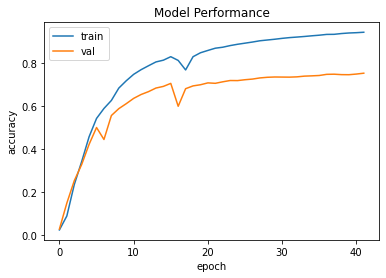

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()